In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-dimreduce-voting)

This matrix describes the votes on bills in the 111th session of the United States Senate. (The data set was obtained from [https://voteview.com].) Each row is one senator, and each column is a vote item.

In [2]:
using JLD2
@load "voting.jld2" A;

If we visualize the votes (yellow is "yea," blue is "nay"), we can see great similarity between many rows, reflecting party unity.

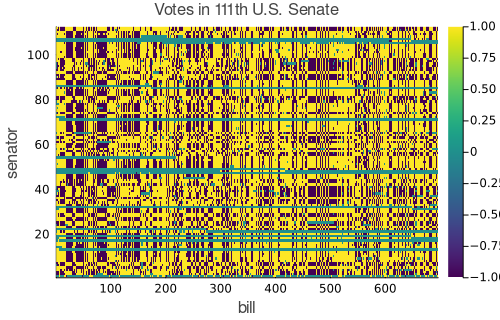

In [3]:
heatmap(A;
    color=:viridis,  xlabel="bill",  ylabel="senator",
    title="Votes in 111th U.S. Senate")

We use {eq}`sing-val-decay` to quantify the decay rate of the values.

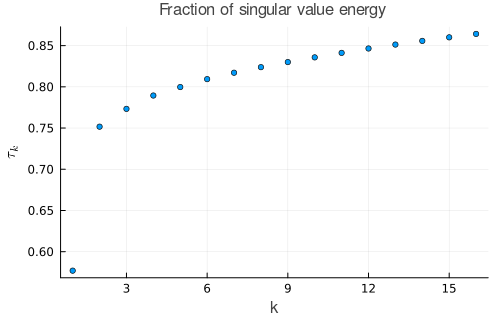

In [4]:
U, σ, V = svd(A)
τ = cumsum(σ .^ 2) / sum(σ .^ 2)
scatter(τ[1:16];
    xaxis=("k"),  yaxis=(L"\tau_k"),
    title="Fraction of singular value energy")

The first and second singular triples contain about 58% and 17%, respectively, of the energy of the matrix. All others have far less effect, suggesting that the information is primarily two-dimensional. The first left and right singular vectors also contain interesting structure.

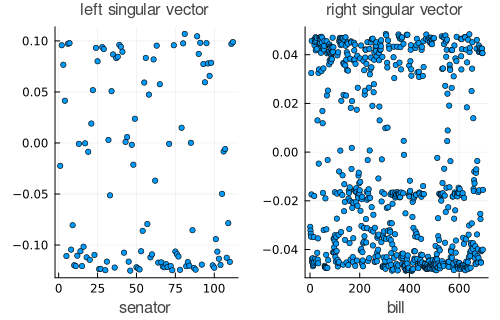

In [5]:
scatter(U[:, 1], label="", layout=(1, 2),
    xlabel="senator",  title="left singular vector")
scatter!(V[:, 1], label="", subplot=2,
    xlabel="bill",  title="right singular vector")

Both vectors have values greatly clustered near $\pm C$ for a constant $C$. These can be roughly interpreted as how partisan a particular senator or bill was, and for which political party. Projecting the senators' vectors into the first two $\mathbf{V}$-coordinates gives a particularly nice way to reduce them to two dimensions. Political scientists label these dimensions *partisanship* and *bipartisanship*. Here we color them by actual party affiliation (also given in the data file): red for Republican, blue for Democrat, and yellow for independent.

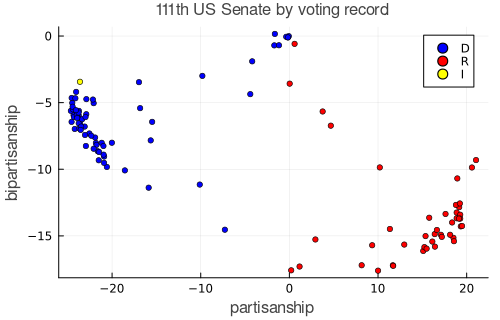

In [6]:
x1 = A * V[:, 1];
x2 = A * V[:, 2];

@load "voting.jld2" Rep Dem Ind
Rep = vec(Rep);
Dem = vec(Dem);
Ind = vec(Ind);
scatter(x1[Dem], x2[Dem];
    color=:blue,  label="D",
    xaxis=("partisanship"),  yaxis=("bipartisanship"), 
    title="111th US Senate by voting record")
scatter!(x1[Rep], x2[Rep], color=:red, label="R")
scatter!(x1[Ind], x2[Ind], color=:yellow, label="I")